![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# **Getting Started Code For [Pneumonia Classification in CXRs](https://dphi.tech/challenges/pneumonia-classification-in-cxrs/76/overview/about) on DPhi**

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [1]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Conv2D, Flatten, BatchNormalization
from keras.optimizers import Adam, SGD

### Check for GPU
Run this code with local GPU

In [2]:
devices = tf.config.list_physical_devices('GPU')
print(devices[0])

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Loading and preparing training data
The train and test images are given in two different folders - 'train' and 'test'.

In [3]:
data=[]
img_size = 100
def create_data():
        for item in ['normal','pneumonia']:
            path='./content/train/' + item+"/"
            
            for img in os.listdir(path):         # os.listdir gets you all the list of name of files located in the given path
                try:
                    img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)    # converts the image to pixels and gray scales the images
                    new_img_array= cv2.resize(img_array,(img_size,img_size))
                    #new_img_array = cv2.cvtColor(new_img_array, cv2.COLOR_GRAY2RGB)
                    # print(img_array)
                    if item == 'normal':
                        data.append([new_img_array, path + img, item])
                    else:
                        data.append([new_img_array, path + img, item]) # appending the list of image pixels and respective target value in data
                except Exception as e:
                    pass                                      # try and except is exception handling case in python, saves you from getting errors
                
            
create_data()

In [4]:
len(data)

2425

In [5]:
core_df= pd.DataFrame(data, columns= ['Image', 'Path', 'Event'])
core_df

,Image,Path,Event
0,"[[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, ...",./content/train/normal/CXR_train_1000.png,normal
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",./content/train/normal/CXR_train_1001.png,normal
2,"[[229, 228, 226, 226, 225, 224, 223, 222, 223,...",./content/train/normal/CXR_train_1002.png,normal
3,"[[242, 241, 241, 241, 240, 240, 240, 239, 238,...",./content/train/normal/CXR_train_1004.png,normal
4,"[[16, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7...",./content/train/normal/CXR_train_1005.png,normal
...,...,...,...
2420,"[[191, 178, 168, 165, 161, 157, 157, 152, 152,...",./content/train/pneumonia/CXR_train_992.png,pneumonia
2421,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",./content/train/pneumonia/CXR_train_993.png,pneumonia
2422,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3,...",./content/train/pneumonia/CXR_train_995.png,pneumonia
2423,"[[9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 9, 9, 9, 9, 9...",./content/train/pneumonia/CXR_train_996.png,pneumonia


#### Shuffle the data

In [6]:
core_df = core_df.sample(frac = 1)
core_df

,Image,Path,Event
1277,"[[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 8, 8,...",./content/train/normal/CXR_train_994.png,normal
2278,"[[167, 176, 186, 187, 191, 187, 180, 176, 170,...",./content/train/pneumonia/CXR_train_733.png,pneumonia
1298,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",./content/train/pneumonia/CXR_train_1035.png,pneumonia
2182,"[[21, 16, 15, 12, 8, 4, 3, 2, 2, 2, 2, 2, 2, 2...",./content/train/pneumonia/CXR_train_527.png,pneumonia
1398,"[[6, 5, 5, 5, 4, 3, 3, 3, 3, 6, 4, 3, 3, 3, 3,...",./content/train/pneumonia/CXR_train_123.png,pneumonia
...,...,...,...
1933,"[[11, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 9...",./content/train/pneumonia/CXR_train_2221.png,pneumonia
256,"[[1, 10, 30, 28, 27, 27, 25, 24, 24, 24, 24, 2...",./content/train/normal/CXR_train_1444.png,normal
299,"[[13, 14, 15, 31, 44, 53, 47, 49, 36, 37, 20, ...",./content/train/normal/CXR_train_1512.png,normal
983,"[[16, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, ...",./content/train/normal/CXR_train_499.png,normal


#### Splitting the data into Train and Validation Set
We want to check the performance of the model that we built. For this purpose, we always split (both independent and dependent data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

In [7]:
# split the data
X_train_df, X_test_df = train_test_split(core_df, test_size=0.25, random_state = 42)

In [8]:
print(X_train_df.shape)
print(X_test_df.shape)

(1818, 3)
(607, 3)


In [9]:
IMG_SIZE= (100, 100)
BATCH_SIZE= 20
train_idg = ImageDataGenerator(rescale= 1/255,
                               samplewise_center= True,
                               samplewise_std_normalization= True,
                               horizontal_flip = True,
                               height_shift_range= 0.05,
                               width_shift_range= 0.1,
                               rotation_range= 5,
                               shear_range = 0.1,
                               zoom_range= 0.15)

test_idg = ImageDataGenerator(rescale= 1/255)

In [10]:
train_gen= train_idg.flow_from_dataframe(X_train_df,
                                         x_col= 'Path',
                                         y_col= 'Event',
                                         target_size=(100, 100),
                                         batch_size= BATCH_SIZE,
                                         #color_mode= 'grayscale',
                                         class_mode='binary')

test_gen= test_idg.flow_from_dataframe(X_test_df,
                                       x_col= 'Path',
                                       y_col= 'Event',
                                       target_size=(100, 100),
                                       batch_size= BATCH_SIZE,
                                       #color_mode= 'grayscale',
                                       class_mode='binary')

Found 1818 validated image filenames belonging to 2 classes.
Found 607 validated image filenames belonging to 2 classes.


## Building Model
Now we are finally ready, and we can train the model.

There are many machine learning or deep learning models like Random Forest, Decision Tree, Multi-Layer Perceptron (MLP), Convolution Neural Network (CNN), etc. to say you some.


Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [11]:
"""# Pretrained Model
base_model= DenseNet121(input_shape= (100, 100, 3),
                        include_top= False)
for layer in base_model.layers:
    layer.trainable= False
x= GlobalAveragePooling2D()(base_model.output)
x= Dropout(0.2)(x)
x= Dense(512, activation= 'relu')(x)
#x= Dropout(0.5)(x)
output= Dense(1, activation='sigmoid')(x)
"""
# Custom model
model= Sequential([
    Conv2D(64, 3, input_shape= (100, 100, 3)),
    MaxPooling2D(2),
    Conv2D(64, 3),
    MaxPooling2D(2),
    Conv2D(128, 3),
    MaxPooling2D(2),
    Conv2D(512, 3),
    MaxPooling2D(2),
    Conv2D(512, 3),
    MaxPooling2D(2),
    Flatten(),
    #Dropout(0.2),
    Dense(512, activation= 'relu'),
    Dense(128, activation= 'relu'),
    Dense(64, activation= 'relu'),
    Dense(32, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

#model = Model(inputs=base_model.input, outputs= output)
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

In [12]:
opt = Adam(learning_rate= 2*1e-4)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
#model.summary()

In [13]:
history= model.fit(train_gen, 
                   steps_per_epoch= 90,
                   epochs= 10,
                   validation_data= test_gen,
                   validation_steps= 30)

Epoch 1/10
90/90 [==============================] - 45s 467ms/step - loss: 0.6768 - accuracy: 0.5770 - val_loss: 0.7139 - val_accuracy: 0.4717
Epoch 2/10
90/90 [==============================] - 41s 457ms/step - loss: 0.6381 - accuracy: 0.6388 - val_loss: 0.6984 - val_accuracy: 0.4750
Epoch 3/10
90/90 [==============================] - 41s 458ms/step - loss: 0.6401 - accuracy: 0.6484 - val_loss: 0.6952 - val_accuracy: 0.4767
Epoch 4/10
90/90 [==============================] - 42s 466ms/step - loss: 0.6594 - accuracy: 0.6172 - val_loss: 0.6768 - val_accuracy: 0.5450
Epoch 5/10
90/90 [==============================] - 41s 461ms/step - loss: 0.6455 - accuracy: 0.6475 - val_loss: 0.6921 - val_accuracy: 0.4833
Epoch 6/10
90/90 [==============================] - 42s 468ms/step - loss: 0.6329 - accuracy: 0.6665 - val_loss: 0.6916 - val_accuracy: 0.4900
Epoch 7/10
90/90 [==============================] - 42s 464ms/step - loss: 0.6494 - accuracy: 0.6302 - val_loss: 0.7277 - val_accuracy: 0.4633

In [14]:
#lrs = 1e-4 * (10 ** (np.arange(10) / 20))
#plt.semilogx(lrs, history.history["loss"])
#plt.axis([1e-4, 1e-2, 0, 3])

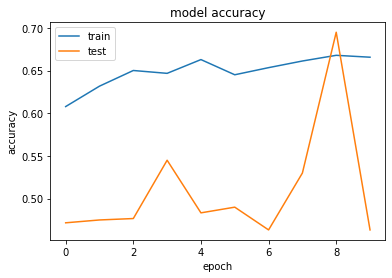

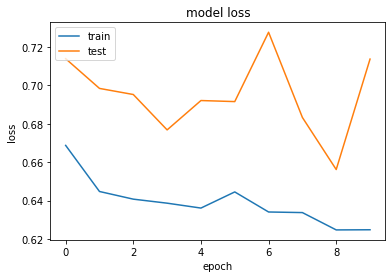

In [15]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Validate the model
Wonder🤔 how well your model learned! Lets check its performance on the X_val data.

In [16]:
model.evaluate(test_gen)

31/31 [==============================] - 10s 319ms/step - loss: 0.7118 - accuracy: 0.4679


[0.7118082046508789, 0.46787479519844055]

## Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data.

#### Load Test Set
Load the test data on which final submission is to be made.

In [17]:
# Loading the order of the image's name that has been provided
test_image_order = pd.read_csv("./content/test.csv")
test_image_order.head()

,filename
0,CXR_test_519.png
1,CXR_test_578.png
2,CXR_test_359.png
3,CXR_test_573.png
4,CXR_test_471.png


#### Getting images file path

In [18]:
file_paths = [[fname, './content/test/' + fname] for fname in test_image_order['filename']]

#### Confirm if number of images in test folder is same as number of image names in 'Testing_set_face_mask.csv'

In [19]:
# Confirm if number of images is same as number of labels given
if len(test_image_order) == len(file_paths):
    print('Number of image names i.e. ', len(test_image_order), 'matches the number of file paths i.e. ', len(file_paths))
else:
    print('Number of image names does not match the number of filepaths')

Number of image names i.e.  606 matches the number of file paths i.e.  606


#### Converting the file_paths to dataframe

In [20]:
test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,CXR_test_519.png,./content/test/CXR_test_519.png
1,CXR_test_578.png,./content/test/CXR_test_578.png
2,CXR_test_359.png,./content/test/CXR_test_359.png
3,CXR_test_573.png,./content/test/CXR_test_573.png
4,CXR_test_471.png,./content/test/CXR_test_471.png


## Data Pre-processing on test_data


In [21]:
test_pixel_data = []     # initialize an empty numpy array
for i in range(len(test_images)):
  
  img_array = cv2.imread(test_images['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale
  new_img_array=cv2.resize(img_array,(img_size,img_size))
  test_pixel_data.append(new_img_array)

In [22]:
test_pixel_data = np.asarray(test_pixel_data)

In [23]:
test_pixel_data =  test_pixel_data.reshape(-1, 100, 100, 1)

In [24]:
test_pixel_data

array([[[[  3],
         [  3],
         [  3],
         ...,
         [  5],
         [  6],
         [  7]],

        [[  3],
         [  2],
         [  2],
         ...,
         [  5],
         [  6],
         [  6]],

        [[  4],
         [  2],
         [  2],
         ...,
         [  5],
         [  5],
         [  6]],

        ...,

        [[  7],
         [  5],
         [  3],
         ...,
         [100],
         [ 85],
         [ 64]],

        [[  7],
         [  4],
         [  3],
         ...,
         [106],
         [ 97],
         [ 71]],

        [[  5],
         [  3],
         [  3],
         ...,
         [103],
         [ 94],
         [ 72]]],


       [[[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         ...,
         [  0],
         [

### Make Prediction on Test Dataset
Time to make a submission!!!

In [25]:
pred = model.predict(test_pixel_data)

ValueError: in user code:

    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\domen\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 100, 100, 1)


In [ ]:
pred

Convert the numerical classes to corresponding categorical classes.

In [ ]:
predictions = []
for item in pred:
  if item <= 0.5:
    predictions.append('normal')
  else:
    predictions.append('pneumonia')

In [ ]:
predictions

## **How to save prediciton results locally via jupyter notebook?**
If you are working on Jupyter notebook, execute below block of codes. A file named 'submission.csv' will be created in your current working directory.

In [ ]:
res = pd.DataFrame({'filename': test_images['filename'], 'label': predictions})  # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

# **OR,**
**If you are working on Google Colab then use the below set of code to save prediction results locally**

## **How to save prediction results locally via colab notebook?**
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

# **Well Done! 👍**
You are all set to make a submission. Let's head to the **[challenge page](https://dphi.tech/challenges/pneumonia-classification-challenge-by-segmind/76/overview/about)** to make the submission.